# Most Expensive Locality

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import reverse_geocoder as rg 
import pprint 

In [ ]:
pip install reverse_geocoder

In [ ]:
data = pd.read_csv("2020-XTern-DS.csv")
# I am uploading a CSV file that contains Locality names please feel free to use it if you want to test it.

#data = pd.read_csv("Xtern-DS-modified.csv")


In [ ]:
# Function to get location name from Latitude	Longitude
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
    #pprint.pprint(result) 
    return result

In [ ]:
#Data preparation by removing restaurants with 'NEW' or 'Opening soon' rating and replacing - with 0
Localitydata = data[data["Rating"] != 'NEW']
Localitydata = Localitydata[Localitydata["Rating"] != 'Opening Soon']
Localitydata = Localitydata.replace(r'-', 0 , regex=True)
Localitydata.drop(['Restaurant'],axis=1,inplace=True)

In [ ]:
# Removing $ symbol and minutes from cook time
Localitydata['Average_Cost'] = Localitydata['Average_Cost'].str.replace(',', '.')
Localitydata['Average_Cost'] = Localitydata['Average_Cost'].str.replace('$', '')
Localitydata['Minimum_Order'] = Localitydata['Minimum_Order'].str.replace('$', '')
Localitydata['Cook_Time'] = Localitydata['Cook_Time'].str.replace(' minutes', '')

In [ ]:
# Looping through each row to add location column in data frame
# Don't run this loop if you are using the modified CSV file that I uploaded
for i, row in Localitydata.iterrows():
  ifor_val = reverseGeocode((row['Latitude'],row['Longitude']))[0]['name']
  Localitydata.at[i,'Locality'] = ifor_val
### This loop is expensive will take some time to run

In [ ]:
Localitydata

,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Locality
0,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20.00,50.00,3.5,12,4,30,Hope
1,39.775933,-85.740581,"Ice Cream, Desserts",10.00,50.00,3.5,11,4,30,Greenfield
2,39.253436,-85.123779,"Italian, Street Food, Fast Food",15.00,50.00,3.6,99,30,65,Sunman
3,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25.00,99.00,3.7,176,95,30,Versailles
4,39.882284,-85.517407,"Cafe, Beverages",20.00,99.00,3.2,521,235,65,Knightstown
...,...,...,...,...,...,...,...,...,...,...
2013,39.764745,-85.121567,Bengali,20.00,50.00,3.3,16,6,30,Cambridge City
2014,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",40.00,0.00,0,0,0,30,Connersville
2015,39.133719,-85.503020,"Awadhi, Bihari",40.00,99.00,4.1,118,91,30,Westport
2017,39.301765,-85.662768,"Kebab, Fast Food",10.00,50.00,0,0,0,30,Geneva


In [ ]:
Localitydata['Locality'].value_counts()

Rushville               122
Connersville            114
Batesville              102
Greensburg               96
Shelbyville              86
Knightstown              80
Westport                 76
New Castle               69
Hope                     65
Cambridge City           65
Saint Paul               62
Osgood                   61
Brookville               61
Columbus                 59
Morristown               57
Hagerstown               53
Greenfield               50
Edinburgh                47
Sunman                   46
New Palestine            41
Country Squire Lakes     39
Pendleton                38
Milan                    38
North Vernon             35
Geneva                   34
Cumberland               31
Versailles               31
Seymour                  30
Centerville              28
Middletown               24
Dillsboro                20
Fortville                18
Ingalls                  17
McCordsville             17
Liberty                  15
Franklin            

In [ ]:
Localitydata['Average_Cost'].value_counts()

20.00     519
15.00     429
10.00     428
25.00     150
30.00     100
40.00      58
35.00      50
5.00       45
50.00      25
60.00      22
80.00      13
55.00      11
45.00       9
65.00       8
75.00       7
90.00       2
1.20        1
150.00      1
85.00       1
95.00       1
1.00        1
100.00      1
Name: Average_Cost, dtype: int64

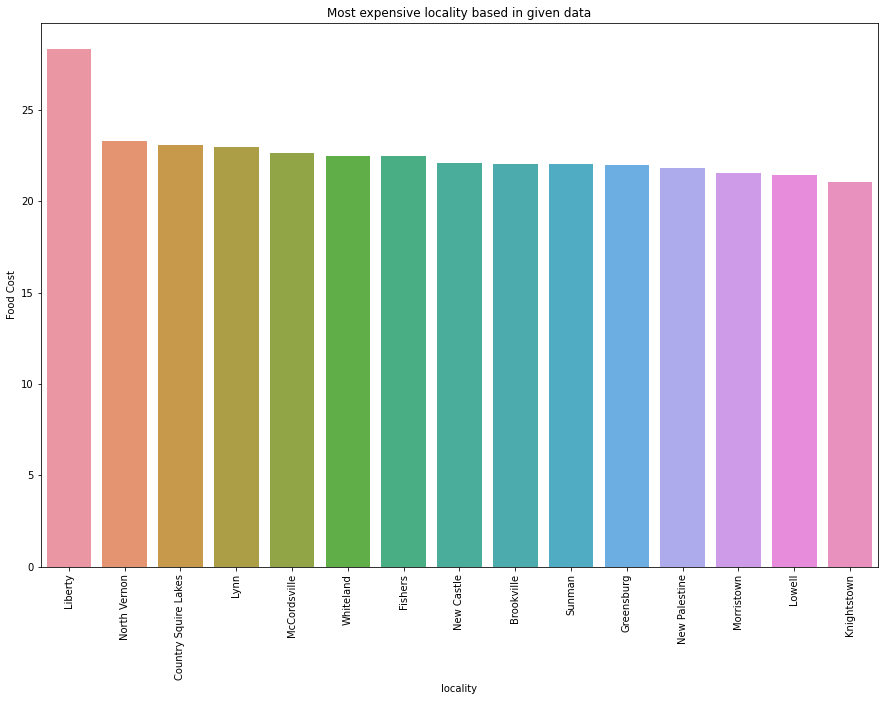

In [ ]:
# Plot 
Localitydata['Average_Cost'] = Localitydata['Average_Cost'].astype(float)
locality_list = list(Localitydata['Locality'].unique())
average_cost_of_2_by_locality=[]
for locality in locality_list:
    x = Localitydata[Localitydata['Locality']==locality]
    avg_cost = sum(x['Average_Cost'])/len(x)
    average_cost_of_2_by_locality.append(avg_cost)
data = pd.DataFrame({'locality':locality_list,'Average_Cost':average_cost_of_2_by_locality})
new_index = (data['Average_Cost'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['locality'][:15],y=sorted_data['Average_Cost'][:15])
plt.xticks(rotation=90)
plt.xlabel("locality")
plt.ylabel("Food Cost")
plt.title("Most expensive locality based in given data")
plt.show()

In [ ]:
Localitydata.to_csv("Xtern-DS-modified.csv")